In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

%matplotlib inline

# D2 - prepare data for multivariate regression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

In [3]:
data.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
# drop top 3 rows and bottom 3 rows
data.drop([0, 1, 2, 352, 353, 354], axis=0, inplace=True )

In [5]:
data.columns = data.loc[3,:]

In [6]:
data.drop([3], axis=0, inplace=True)

In [7]:
data.set_index('City', inplace=True)

In [8]:
data.head()

3,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [9]:
data.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [10]:
data_reg = data[['Population', 'Murder and\nnonnegligent\nmanslaughter','Robbery','Property\ncrime','Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft']]

In [11]:
data_reg['Murder'] = data_reg['Murder and\nnonnegligent\nmanslaughter']
data_reg['Larceny'] = data_reg['Larceny-\ntheft']
data_reg['Auto'] = data_reg['Motor\nvehicle\ntheft']
data_reg['Property'] = data_reg['Property\ncrime']

/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [12]:
data_reg.drop(['Murder and\nnonnegligent\nmanslaughter','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft'], axis=1, inplace=True)

/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data_reg.head()

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property
City,,,,,,,
Adams Village,"1,861",0,2,0,10,0,12
Addison Town and Village,"2,577",0,3,0,20,1,24
Akron Village,"2,846",0,1,0,15,0,16
Albany,"97,956",227,705,8,"3,243",142,"4,090"
Albion Village,"6,388",4,53,0,165,5,223


In [14]:
data_reg2 = (data_reg.applymap(lambda s: s.replace(',',''))).copy().astype(int)

In [15]:
data_reg2['Murder_b'] = data_reg2['Murder'].apply(lambda x: 1 if x>0 else 0)

In [16]:
data_reg2['Robbery_b'] = data_reg2['Robbery'].apply(lambda x: 1 if x>0 else 0)

In [17]:
data_reg2['Population2'] = data_reg2['Population'].pow(2)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

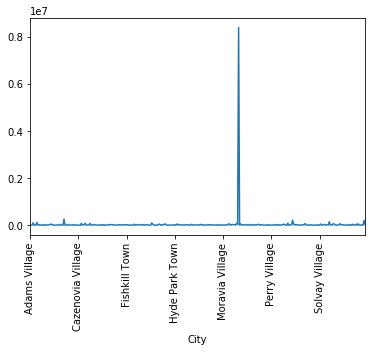

In [18]:
data_reg2['Population'].plot()
plt.xticks(rotation=90)

In [19]:
idx = np.where(data_reg2['Population']>0.5*1e7)

In [20]:
# outliers
data_reg2.iloc[list(idx[0]),:]

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Murder_b,Robbery_b,Population2
City,,,,,,,,,,
New York,8396126,19170,16606,335,117931,7434,141971,1,1,70494931807876


In [21]:
# remove outliers
data_reg2.drop(['New York'], axis=0, inplace=True)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

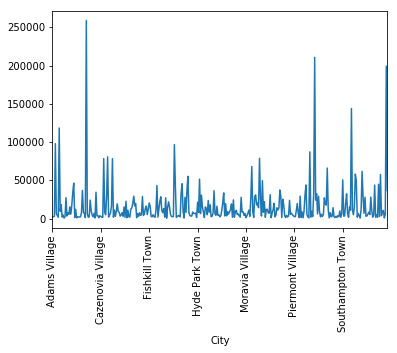

In [22]:
data_reg2['Population'].plot()
plt.xticks(rotation=90)

In [23]:
data_reg2.head()

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Murder_b,Robbery_b,Population2
City,,,,,,,,,,
Adams Village,1861,0,2,0,10,0,12,0,0,3463321
Addison Town and Village,2577,0,3,0,20,1,24,0,0,6640929
Akron Village,2846,0,1,0,15,0,16,0,0,8099716
Albany,97956,227,705,8,3243,142,4090,1,1,9595377936
Albion Village,6388,4,53,0,165,5,223,0,1,40806544


# D4 - Predict Property Crime

In [24]:
regr = linear_model.LinearRegression()

In [25]:
y = data_reg2['Property']
y2 = np.array(y).reshape(-1,1)

In [26]:
x = data_reg2[['Population','Population2', 'Murder_b','Robbery_b']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.844493761117


In [27]:
x = data_reg2[['Population', 'Murder_b','Robbery_b']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.788942800091


In [28]:
x = data_reg2[['Population','Population2','Robbery_b']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.841549137196


In [29]:
x = data_reg2[['Population','Population2','Murder_b']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.843013263732


In [30]:
x = data_reg2[['Population','Population2']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.839673824347


In [31]:
x = data_reg2[['Population']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.787222200252


Some observations and questions:
1. the R2 can change simply by adding new variables, so the R2 should, in theory, be adjusted for the number of explanatory variables
2. All the R2s are in the same ballpark (with the caveat that these are not adjusted)
3. Population seems to be relevant and so does the exitence of crime.
4. But it is not clear to me why the roberry and murder variables should be binary (categorical). 
5. In principle, it makes sense to talk about population as being a relevant variable, and even population^2 (because one could argue that relationships increase more than linearly in a bigger city)

In [32]:
x = data_reg2[['Population','Population2','Murder']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.931271159653


In [33]:
x = data_reg2[['Population','Murder']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.9286776454


In [34]:
x = data_reg2[['Population','Population2','Larceny']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.994824652002


In [35]:
x = data_reg2[['Population','Population2','Auto']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.94704084506


In [36]:
x = data_reg2[['Population','Larceny']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.989731489386


In [37]:
x = data_reg2[['Larceny']]
x2 = np.array(x)
# Fit our model to our data.
regr.fit(x2, y2)

# Display the R2
print('R2: \n', regr.score(x2,y2))

R2: 
 0.989293348046


The problem here is that 'Larceny' and 'Auto' are property crimes so they are very correlated with 'Property' to begin with. 

I would try to use 'Population' and 'Murder' as variables in my regression. 'Population2' doesn't add much, the binary versions are relatively useless and 'Auto' and 'Larceny' are themselves property crimes so very correlated with the variable we are trying to predict. 

Note: I didn't look at t-stats on purpose to remain the scope of the exercise. 